In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
df = pd.read_csv("../Data/Processed/cleaned_csv.csv")
df.head(3)

Unnamed: 0  work_year experience_level employment_type  \
0           0       2023               MI              FT   
1           1       2023               MI              FT   
2           2       2024               MI              FT   

                   job_title  salary salary_currency  salary_in_usd  \
0               Data Analyst  165000             USD         165000   
1               Data Analyst   70000             USD          70000   
2  Machine Learning Engineer   85000             EUR          94444   

  employee_residence  remote_ratio company_location company_size  
0                 AU             0               AU            M  
1                 US           100               US            M  
2                 IE           100               IE            M

In [7]:
fresher_job_vs_salary = df[df['experience_level']=='EN'].groupby('job_title').agg(median_salary = ('salary_in_usd','median'),job_count = ('salary_in_usd','count')).sort_values(by='median_salary',ascending=False).reset_index()
fresher_job_vs_salary

job_title  median_salary  job_count
0        Engineering Manager       342500.0          6
1               Head of Data       240500.0          2
2                   Director       205000.0          6
3    Quantitative Researcher       200000.0          8
4         Software Architect       190000.0          2
..                       ...            ...        ...
187   Data Platform Engineer        21052.0          1
188  Data Analytics Engineer        20000.0          1
189               Alternance        19825.0          2
190        Data Analyst Lead        18000.0          1
191        Big Data Engineer        17600.0          5

[192 rows x 3 columns]

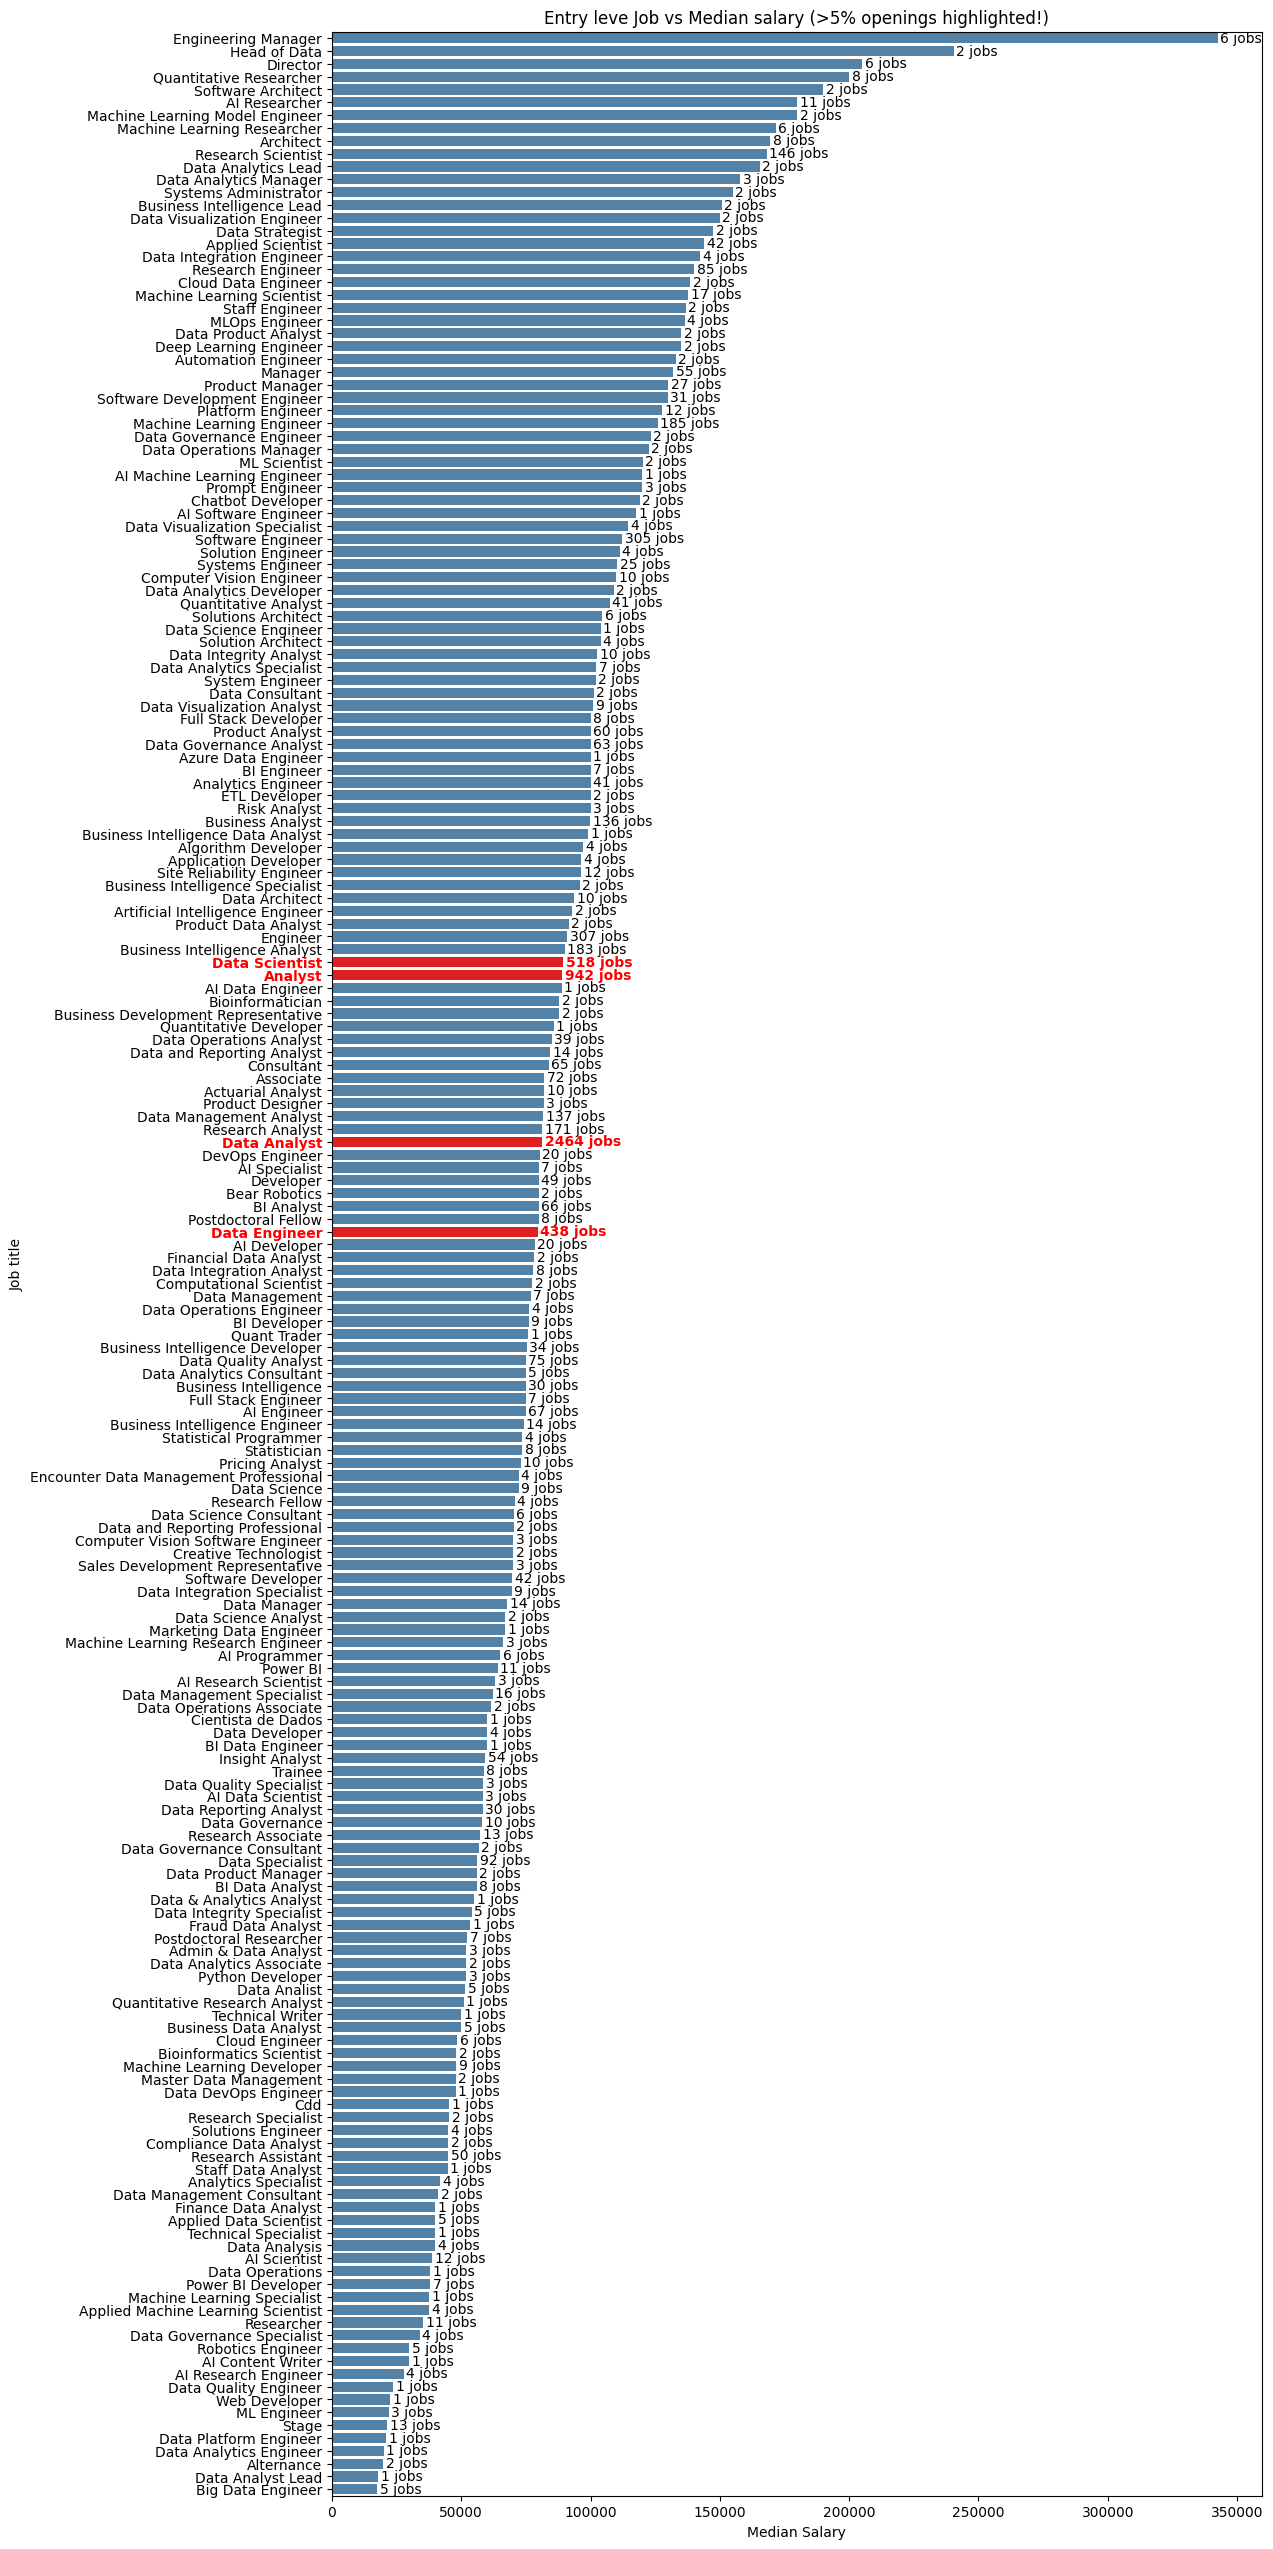

In [8]:
thrushold = 0.05*len(df[df['experience_level']=='EN'])
fresher_job_vs_salary['highlight'] = fresher_job_vs_salary.job_count >= thrushold

highlight_palette = {True : 'red', False : 'steelblue'}

plt.figure(figsize=(12,len(fresher_job_vs_salary)/6))
ax = sns.barplot(data=fresher_job_vs_salary, x = 'median_salary', y = 'job_title', hue = 'highlight', palette = highlight_palette, legend=False)

for i,row in fresher_job_vs_salary.iterrows(): 
    color = 'red' if row['job_count'] >= thrushold else 'black'
    weight = 'bold' if row['job_count'] >= thrushold else 'normal'
    
    ax.text(        
        row['median_salary'] + 1000,
        i,
        f"{row['job_count']} jobs",
        va='center', 
        color = color,
        weight = weight
    )

yticks = ax.get_yticklabels()
for i,tick in enumerate(yticks):
    if fresher_job_vs_salary.loc[i,'highlight']:
        tick.set_color('red')
        tick.set_fontweight('bold')


plt.xlabel("Median Salary")
plt.ylabel("Job title")
plt.title("Entry leve Job vs Median salary (>5% openings highlighted!)")
plt.show()

In [9]:
mid_experience_job_vs_salary = df[df['experience_level']=='MI'].groupby('job_title').agg(median_salary = ('salary_in_usd','median'),job_count = ('salary_in_usd','count')).sort_values(by='median_salary',ascending=False).reset_index()
mid_experience_job_vs_salary

job_title  median_salary  job_count
0                          AI Architect       800000.0          1
1                    AWS Data Architect       258000.0          1
2       Machine Learning Model Engineer       255000.0          2
3                  Data Governance Lead       243650.0          4
4    Machine Learning Platform Engineer       226920.0          4
..                                  ...            ...        ...
300                   QA Tutor Reviewer        24000.0          7
301                               Stage        19578.5          2
302                Product Data Analyst        18208.5          4
303           Quantitative Risk Analyst        18000.0          1
304       3D Computer Vision Researcher         5409.0          1

[305 rows x 3 columns]

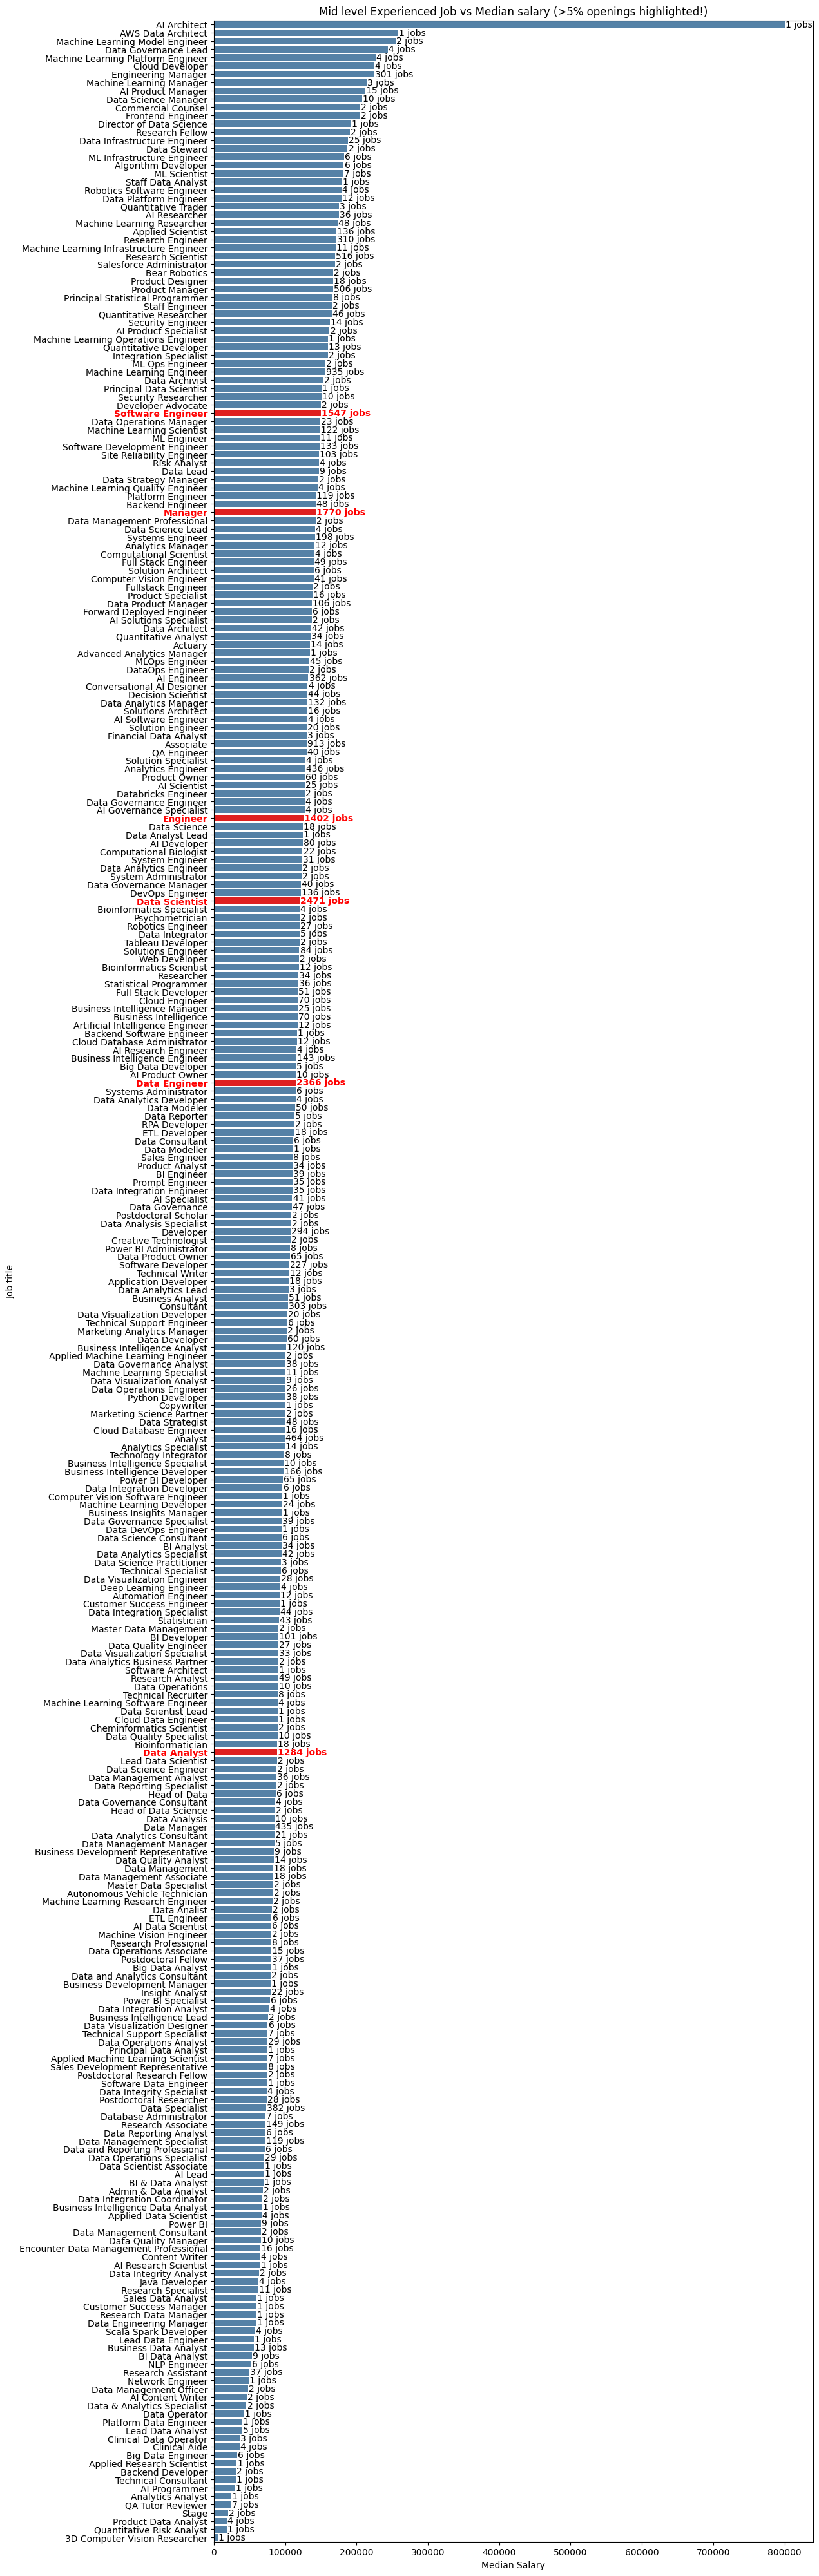

In [10]:
thrushold = 0.05*len(df[df['experience_level']=='MI'])
mid_experience_job_vs_salary['highlight'] = mid_experience_job_vs_salary.job_count >= thrushold

highlight_palette = {True : 'red', False : 'steelblue'}

plt.figure(figsize=(12,len(mid_experience_job_vs_salary)/6))
ax = sns.barplot(data=mid_experience_job_vs_salary, x = 'median_salary', y = 'job_title', hue = 'highlight', palette = highlight_palette, legend=False)

for i,row in mid_experience_job_vs_salary.iterrows(): 
    color = 'red' if row['job_count'] >= thrushold else 'black'
    weight = 'bold' if row['job_count'] >= thrushold else 'normal'
    
    ax.text(        
        row['median_salary'] + 1000,
        i,
        f"{row['job_count']} jobs",
        va='center', 
        color = color,
        weight = weight
    )

yticks = ax.get_yticklabels()
for i,tick in enumerate(yticks):
    if mid_experience_job_vs_salary.loc[i,'highlight']:
        tick.set_color('red')
        tick.set_fontweight('bold')


plt.xlabel("Median Salary")
plt.ylabel("Job title")
plt.title("Mid level Experienced Job vs Median salary (>5% openings highlighted!)")
plt.show()

In [11]:
senior_job_vs_salary = df[df['experience_level']=='SE'].groupby('job_title').agg(median_salary = ('salary_in_usd','median'),job_count = ('salary_in_usd','count')).sort_values(by='median_salary',ascending=False).reset_index()
senior_job_vs_salary

job_title  median_salary  job_count
0                  Research Team Lead       450000.0          2
1       Analytics Engineering Manager       399880.0          1
2              Data Science Tech Lead       375000.0          1
3              Deep Learning Engineer       293583.5          4
4                  Applied AI ML Lead       292500.0          2
..                                ...            ...        ...
336              Data DevOps Engineer        53984.0          1
337                  CRM Data Analyst        40000.0          1
338          Principal Data Architect        38154.0          1
339  AI Software Development Engineer        25210.0          1
340               AI Engineering Lead        23649.0          1

[341 rows x 3 columns]

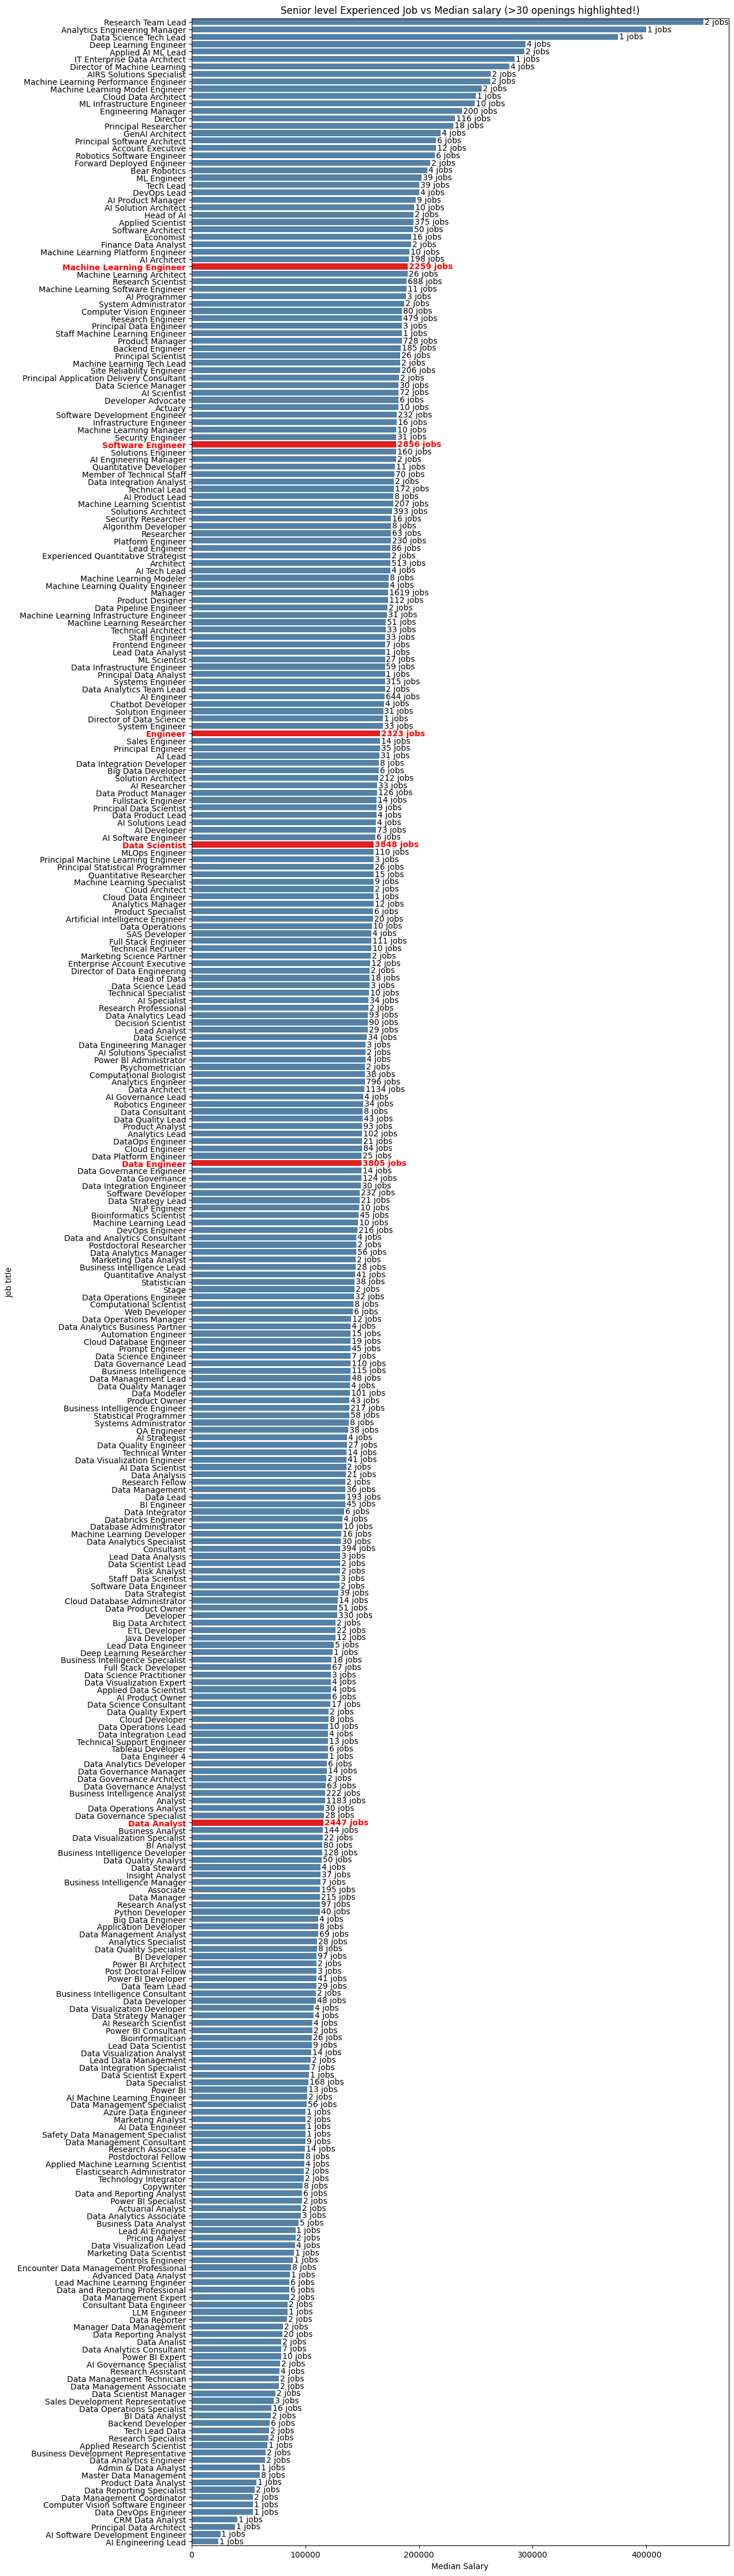

In [12]:
thrushold = 0.05*len(df[df['experience_level']=='SE'])
senior_job_vs_salary['highlight'] = senior_job_vs_salary.job_count >= thrushold

highlight_palette = {True : 'red', False : 'steelblue'}

plt.figure(figsize=(12,len(senior_job_vs_salary)/6))
ax = sns.barplot(data=senior_job_vs_salary, x = 'median_salary', y = 'job_title', hue = 'highlight', palette = highlight_palette, legend=False)

for i,row in senior_job_vs_salary.iterrows(): 
    color = 'red' if row['job_count'] >= thrushold else 'black'
    weight = 'bold' if row['job_count'] >= thrushold else 'normal'
    
    ax.text(        
        row['median_salary'] + 1000,
        i,
        f"{row['job_count']} jobs",
        va='center', 
        color = color,
        weight = weight
    )

yticks = ax.get_yticklabels()
for i,tick in enumerate(yticks):
    if senior_job_vs_salary.loc[i,'highlight']:
        tick.set_color('red')
        tick.set_fontweight('bold')


plt.xlabel("Median Salary")
plt.ylabel("Job title")
plt.title("Senior level Experienced Job vs Median salary (>30 openings highlighted!)")
plt.show()

In [13]:
Expert_level_job_vs_salary = df[df['experience_level']=='EX'].groupby('job_title').agg(median_salary = ('salary_in_usd','median'),job_count = ('salary_in_usd','count')).sort_values(by='median_salary',ascending=False).reset_index()
Expert_level_job_vs_salary

job_title  median_salary  job_count
0        Principal Data Engineer       600000.0          1
1       Principal Data Scientist       416000.0          1
2              Research Engineer       290000.0          2
3             Head of Applied AI       281500.0          6
4             Principal Engineer       280000.0          2
..                           ...            ...        ...
117     Data Engineering Manager        79833.0          1
118  Data Visualization Designer        73920.0          2
119      Data Science Consultant        69741.0          1
120          People Data Analyst        45000.0          1
121           Staff Data Analyst        15000.0          1

[122 rows x 3 columns]

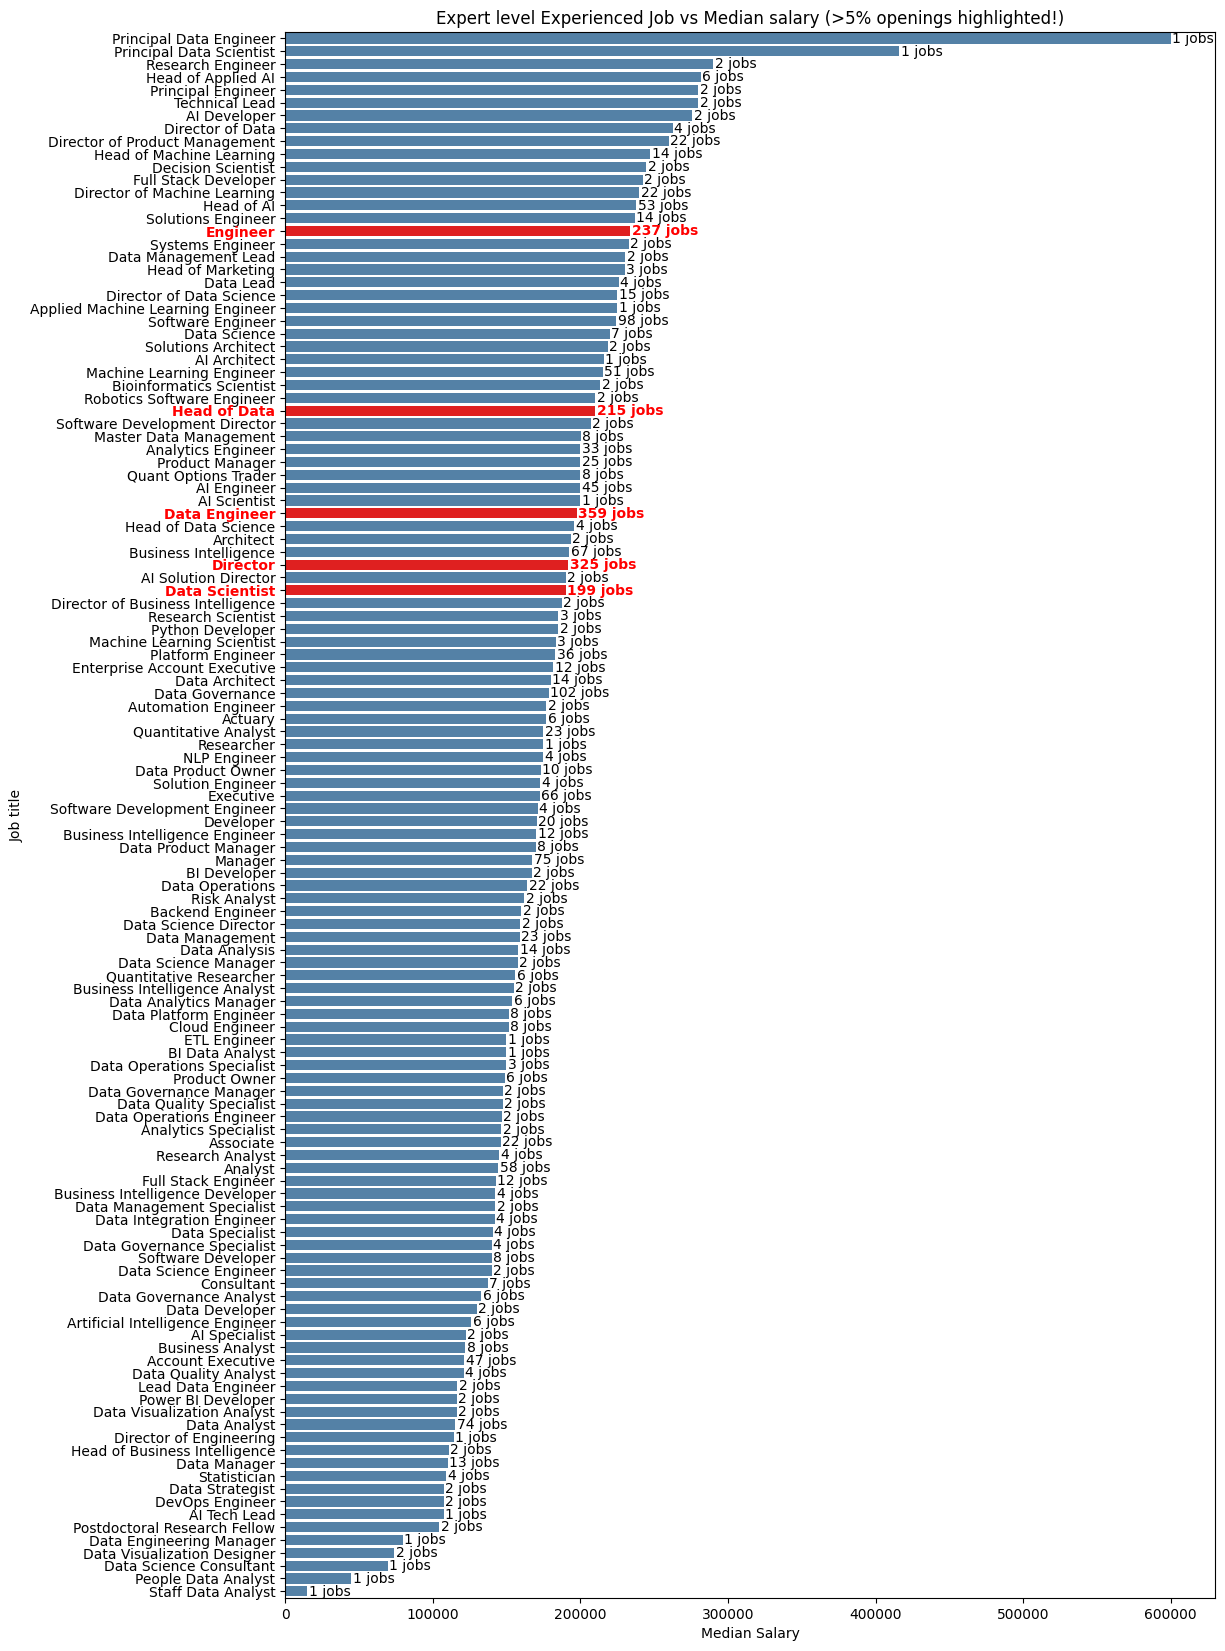

In [14]:
thrushold = 0.05*len(df[df['experience_level']=='EX'])
Expert_level_job_vs_salary['highlight'] = Expert_level_job_vs_salary.job_count >= thrushold

highlight_palette = {True : 'red', False : 'steelblue'}

plt.figure(figsize=(12,len(Expert_level_job_vs_salary)/6))
ax = sns.barplot(data=Expert_level_job_vs_salary, x = 'median_salary', y = 'job_title', hue = 'highlight', palette = highlight_palette, legend=False)

for i,row in Expert_level_job_vs_salary.iterrows(): 
    color = 'red' if row['job_count'] >= thrushold else 'black'
    weight = 'bold' if row['job_count'] >= thrushold else 'normal'
    
    ax.text(        
        row['median_salary'] + 1000,
        i,
        f"{row['job_count']} jobs",
        va='center', 
        color = color,
        weight = weight
    )

yticks = ax.get_yticklabels()
for i,tick in enumerate(yticks):
    if Expert_level_job_vs_salary.loc[i,'highlight']:
        tick.set_color('red')
        tick.set_fontweight('bold')


plt.xlabel("Median Salary")
plt.ylabel("Job title")
plt.title("Expert level Experienced Job vs Median salary (>5% openings highlighted!)")
plt.show()